In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import uniform_filter1d
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries loaded successfully")

✅ Libraries loaded successfully


In [2]:
# --- LOAD SILVER BASKET PREDICTIONS ---

try:
    # Load silver basket predictions
    silver_basket_df = pd.read_csv('./silver_basket_predictions.csv')
    silver_basket_df['Date'] = pd.to_datetime(silver_basket_df['Date'])
    silver_basket_df = silver_basket_df.sort_values('Date')
    
    print(f"✅ Loaded {len(silver_basket_df)} rows of silver basket predictions")
    print(f"\nDate range: {silver_basket_df['Date'].min()} to {silver_basket_df['Date'].max()}")
    print(f"\nFirst few rows:")
    print(silver_basket_df.head())
    
except FileNotFoundError:
    print("⚠️  Warning: silver_basket_predictions.csv not found")

✅ Loaded 998 rows of silver basket predictions

Date range: 2021-01-13 00:00:00 to 2024-12-31 00:00:00

First few rows:
        Date  Silver_Actual  Silver_Predicted  Basket_Price  Price_Spread
0 2021-01-13         25.520           26.0146       23.4214        2.0986
1 2021-01-14         25.746           26.2148       23.2523        2.4937
2 2021-01-15         24.825           25.8240       23.1222        1.7028
3 2021-01-19         25.279           26.0646       23.2699        2.0091
4 2021-01-20         25.734           26.2182       23.5133        2.2207


In [3]:
# --- CALCULATE SMOOTHING ---
# Create smoothed versions of the data using different window sizes

# Apply moving average smoothing with window size of 7 days
window_size = 7
silver_basket_df['Silver_Predicted_Smooth'] = silver_basket_df['Silver_Predicted'].rolling(
    window=window_size, center=True
).mean()
silver_basket_df['Basket_Price_Smooth'] = silver_basket_df['Basket_Price'].rolling(
    window=window_size, center=True
).mean()

print(f"✅ Applied {window_size}-day moving average smoothing")
print(f"\nData with smoothing:")
print(silver_basket_df.head(10))

✅ Applied 7-day moving average smoothing

Data with smoothing:
        Date  Silver_Actual  Silver_Predicted  Basket_Price  Price_Spread  \
0 2021-01-13         25.520           26.0146       23.4214        2.0986   
1 2021-01-14         25.746           26.2148       23.2523        2.4937   
2 2021-01-15         24.825           25.8240       23.1222        1.7028   
3 2021-01-19         25.279           26.0646       23.2699        2.0091   
4 2021-01-20         25.734           26.2182       23.5133        2.2207   
5 2021-01-21         25.822           26.3225       23.5386        2.2834   
6 2021-01-22         25.524           26.1137       23.8336        1.6904   
7 2021-01-25         25.455           26.2232       23.6179        1.8371   
8 2021-01-26         25.529           26.1658       23.3847        2.1443   
9 2021-01-27         25.376           25.8910       23.4214        1.9546   

   Silver_Predicted_Smooth  Basket_Price_Smooth  
0                      NaN             

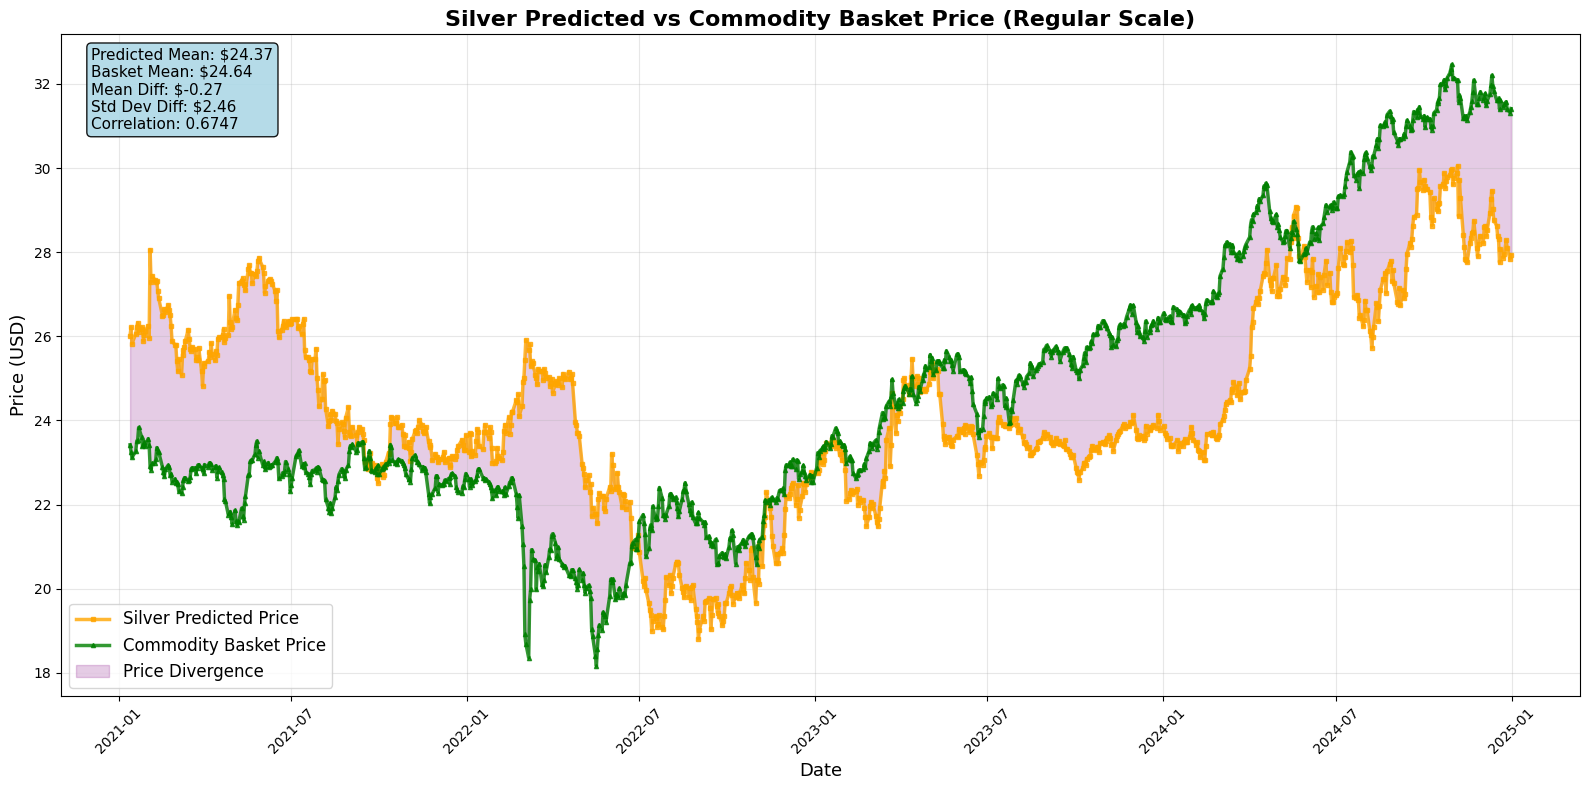

✅ Regular scale graph saved: silver_basket_regular_scale.png


In [4]:
# --- GRAPH 1: REGULAR SCALE ---
# Original data with all fluctuations visible

fig, ax = plt.subplots(figsize=(16, 8))

# Plot predicted and basket price
ax.plot(silver_basket_df['Date'], silver_basket_df['Silver_Predicted'], 
        linewidth=2.5, color='orange', marker='s', markersize=3, 
        label='Silver Predicted Price', alpha=0.8)
ax.plot(silver_basket_df['Date'], silver_basket_df['Basket_Price'], 
        linewidth=2.5, color='green', marker='^', markersize=3, 
        label='Commodity Basket Price', alpha=0.8)

# Fill between for visualization
ax.fill_between(silver_basket_df['Date'], 
                silver_basket_df['Silver_Predicted'],
                silver_basket_df['Basket_Price'],
                alpha=0.2, color='purple', label='Price Divergence')

# Formatting
ax.set_title('Silver Predicted vs Commodity Basket Price (Regular Scale)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=13)
ax.set_ylabel('Price (USD)', fontsize=13)
ax.legend(loc='best', fontsize=12)
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)

# Add statistics box
pred_mean = silver_basket_df['Silver_Predicted'].mean()
basket_mean = silver_basket_df['Basket_Price'].mean()
price_diff_mean = (silver_basket_df['Silver_Predicted'] - silver_basket_df['Basket_Price']).mean()
price_diff_std = (silver_basket_df['Silver_Predicted'] - silver_basket_df['Basket_Price']).std()
correlation = silver_basket_df['Silver_Predicted'].corr(silver_basket_df['Basket_Price'])
max_premium = (silver_basket_df['Silver_Predicted'] - silver_basket_df['Basket_Price']).max()
max_discount = (silver_basket_df['Silver_Predicted'] - silver_basket_df['Basket_Price']).min()

stats_text = (f'Predicted Mean: ${pred_mean:.2f}\n'
              f'Basket Mean: ${basket_mean:.2f}\n'
              f'Mean Diff: ${price_diff_mean:.2f}\n'
              f'Std Dev Diff: ${price_diff_std:.2f}\n'
              f'Correlation: {correlation:.4f}')
ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.9))

plt.tight_layout()
plt.savefig('silver_basket_regular_scale.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Regular scale graph saved: silver_basket_regular_scale.png")

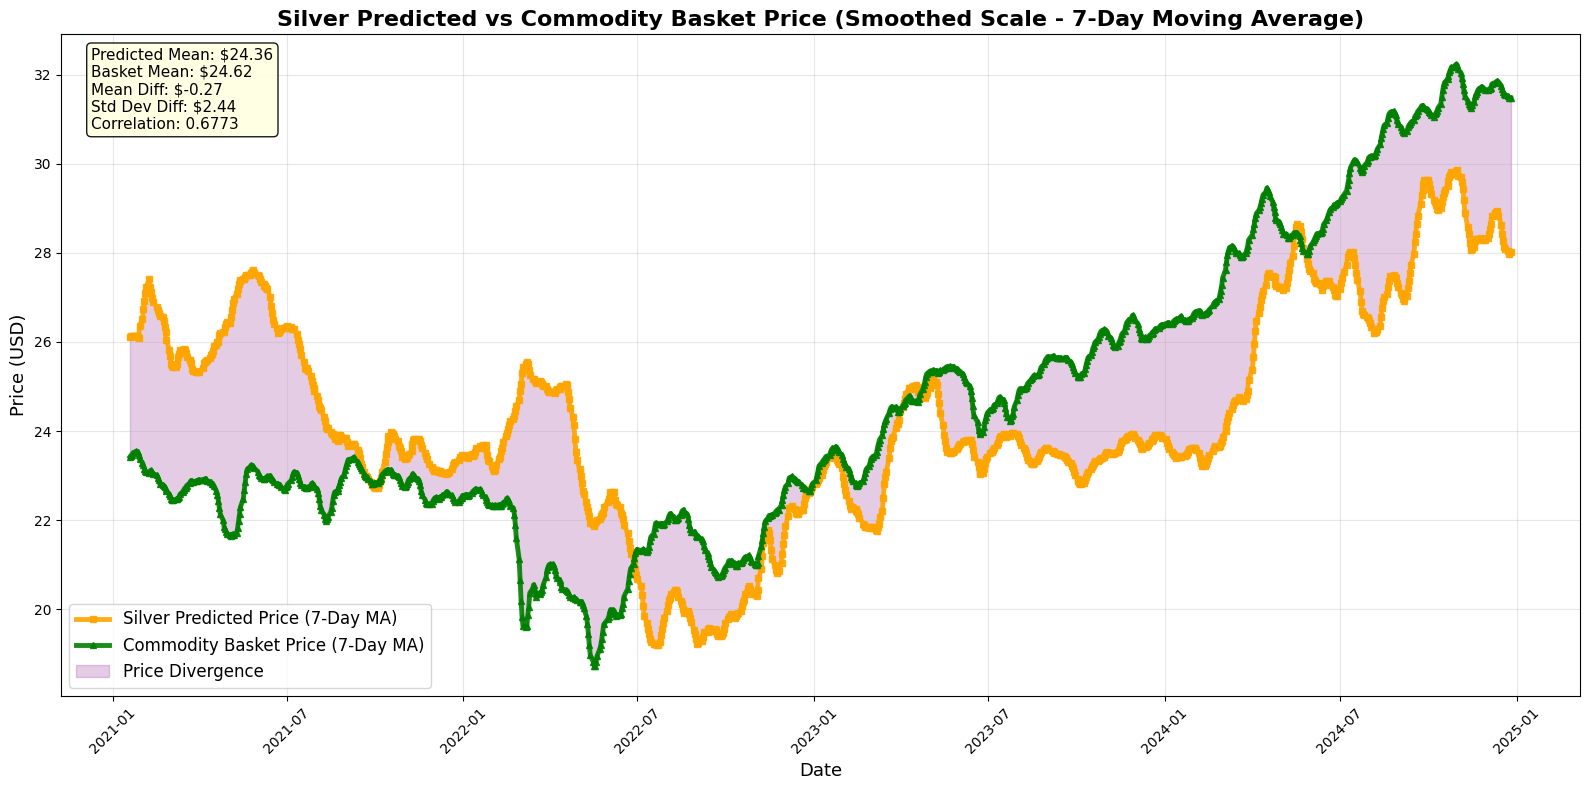

✅ Smoothed scale graph saved: silver_basket_smoothed_scale.png


In [5]:
# --- GRAPH 2: SMOOTHED SCALE ---
# Smoothed data to show underlying trends without daily kinks

fig, ax = plt.subplots(figsize=(16, 8))

# Plot smoothed predicted and basket price
ax.plot(silver_basket_df['Date'], silver_basket_df['Silver_Predicted_Smooth'], 
        linewidth=3.5, color='orange', marker='s', markersize=5, 
        label='Silver Predicted Price (7-Day MA)', alpha=0.9)
ax.plot(silver_basket_df['Date'], silver_basket_df['Basket_Price_Smooth'], 
        linewidth=3.5, color='green', marker='^', markersize=5, 
        label='Commodity Basket Price (7-Day MA)', alpha=0.9)

# Fill between for visualization
ax.fill_between(silver_basket_df['Date'], 
                silver_basket_df['Silver_Predicted_Smooth'],
                silver_basket_df['Basket_Price_Smooth'],
                alpha=0.2, color='purple', label='Price Divergence')

# Formatting
ax.set_title('Silver Predicted vs Commodity Basket Price (Smoothed Scale - 7-Day Moving Average)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=13)
ax.set_ylabel('Price (USD)', fontsize=13)
ax.legend(loc='best', fontsize=12)
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)

# Add statistics box for smoothed data
pred_smooth_mean = silver_basket_df['Silver_Predicted_Smooth'].mean()
basket_smooth_mean = silver_basket_df['Basket_Price_Smooth'].mean()
price_diff_smooth_mean = (silver_basket_df['Silver_Predicted_Smooth'] - silver_basket_df['Basket_Price_Smooth']).mean()
price_diff_smooth_std = (silver_basket_df['Silver_Predicted_Smooth'] - silver_basket_df['Basket_Price_Smooth']).std()
correlation_smooth = silver_basket_df['Silver_Predicted_Smooth'].corr(silver_basket_df['Basket_Price_Smooth'])
max_premium_smooth = (silver_basket_df['Silver_Predicted_Smooth'] - silver_basket_df['Basket_Price_Smooth']).max()
max_discount_smooth = (silver_basket_df['Silver_Predicted_Smooth'] - silver_basket_df['Basket_Price_Smooth']).min()

stats_text = (f'Predicted Mean: ${pred_smooth_mean:.2f}\n'
              f'Basket Mean: ${basket_smooth_mean:.2f}\n'
              f'Mean Diff: ${price_diff_smooth_mean:.2f}\n'
              f'Std Dev Diff: ${price_diff_smooth_std:.2f}\n'
              f'Correlation: {correlation_smooth:.4f}')
ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))

plt.tight_layout()
plt.savefig('silver_basket_smoothed_scale.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Smoothed scale graph saved: silver_basket_smoothed_scale.png")

In [6]:
# --- DETAILED STATISTICS COMPARISON ---

print("\n" + "="*80)
print("SILVER PREDICTED VS COMMODITY BASKET PRICE - DETAILED ANALYSIS")
print("="*80)

print("\n📊 REGULAR (UNSMOOTHED) DATA STATISTICS:")
print(f"\nSilver Predicted Price:")
print(f"  Mean: ${silver_basket_df['Silver_Predicted'].mean():.2f}")
print(f"  Min: ${silver_basket_df['Silver_Predicted'].min():.2f}")
print(f"  Max: ${silver_basket_df['Silver_Predicted'].max():.2f}")
print(f"  Std Dev: ${silver_basket_df['Silver_Predicted'].std():.2f}")

print(f"\nCommodity Basket Price:")
print(f"  Mean: ${silver_basket_df['Basket_Price'].mean():.2f}")
print(f"  Min: ${silver_basket_df['Basket_Price'].min():.2f}")
print(f"  Max: ${silver_basket_df['Basket_Price'].max():.2f}")
print(f"  Std Dev: ${silver_basket_df['Basket_Price'].std():.2f}")

print(f"\nPrice Difference (Silver Predicted - Basket):")
price_diff = silver_basket_df['Silver_Predicted'] - silver_basket_df['Basket_Price']
print(f"  Mean Difference: ${price_diff.mean():.2f} (Silver Premium/Discount)")
print(f"  Std Dev of Difference: ${price_diff.std():.2f}")
print(f"  Max Premium: ${price_diff.max():.2f}")
print(f"  Max Discount: ${price_diff.min():.2f}")
print(f"  Correlation: {silver_basket_df['Silver_Predicted'].corr(silver_basket_df['Basket_Price']):.4f}")

print("\n" + "-"*80)
print("\n📊 SMOOTHED DATA STATISTICS (7-Day Moving Average):")
print(f"\nSilver Predicted Price (Smoothed):")
print(f"  Mean: ${silver_basket_df['Silver_Predicted_Smooth'].mean():.2f}")
print(f"  Min: ${silver_basket_df['Silver_Predicted_Smooth'].min():.2f}")
print(f"  Max: ${silver_basket_df['Silver_Predicted_Smooth'].max():.2f}")
print(f"  Std Dev: ${silver_basket_df['Silver_Predicted_Smooth'].std():.2f}")

print(f"\nCommodity Basket Price (Smoothed):")
print(f"  Mean: ${silver_basket_df['Basket_Price_Smooth'].mean():.2f}")
print(f"  Min: ${silver_basket_df['Basket_Price_Smooth'].min():.2f}")
print(f"  Max: ${silver_basket_df['Basket_Price_Smooth'].max():.2f}")
print(f"  Std Dev: ${silver_basket_df['Basket_Price_Smooth'].std():.2f}")

print(f"\nPrice Difference (Smoothed - Silver Predicted - Basket):")
price_diff_smooth = silver_basket_df['Silver_Predicted_Smooth'] - silver_basket_df['Basket_Price_Smooth']
print(f"  Mean Difference: ${price_diff_smooth.mean():.2f} (Silver Premium/Discount)")
print(f"  Std Dev of Difference: ${price_diff_smooth.std():.2f}")
print(f"  Max Premium: ${price_diff_smooth.max():.2f}")
print(f"  Max Discount: ${price_diff_smooth.min():.2f}")
print(f"  Correlation: {silver_basket_df['Silver_Predicted_Smooth'].corr(silver_basket_df['Basket_Price_Smooth']):.4f}")

print("\n" + "="*80)


SILVER PREDICTED VS COMMODITY BASKET PRICE - DETAILED ANALYSIS

📊 REGULAR (UNSMOOTHED) DATA STATISTICS:

Silver Predicted Price:
  Mean: $24.37
  Min: $18.81
  Max: $30.05
  Std Dev: $2.46

Commodity Basket Price:
  Mean: $24.64
  Min: $18.16
  Max: $32.47
  Std Dev: $3.33

Price Difference (Silver Predicted - Basket):
  Mean Difference: $-0.27 (Silver Premium/Discount)
  Std Dev of Difference: $2.46
  Max Premium: $7.31
  Max Discount: $-4.31
  Correlation: 0.6747

--------------------------------------------------------------------------------

📊 SMOOTHED DATA STATISTICS (7-Day Moving Average):

Silver Predicted Price (Smoothed):
  Mean: $24.36
  Min: $19.20
  Max: $29.87
  Std Dev: $2.44

Commodity Basket Price (Smoothed):
  Mean: $24.62
  Min: $18.73
  Max: $32.23
  Std Dev: $3.31

Price Difference (Smoothed - Silver Predicted - Basket):
  Mean Difference: $-0.27 (Silver Premium/Discount)
  Std Dev of Difference: $2.44
  Max Premium: $5.94
  Max Discount: $-4.07
  Correlation: 0.6

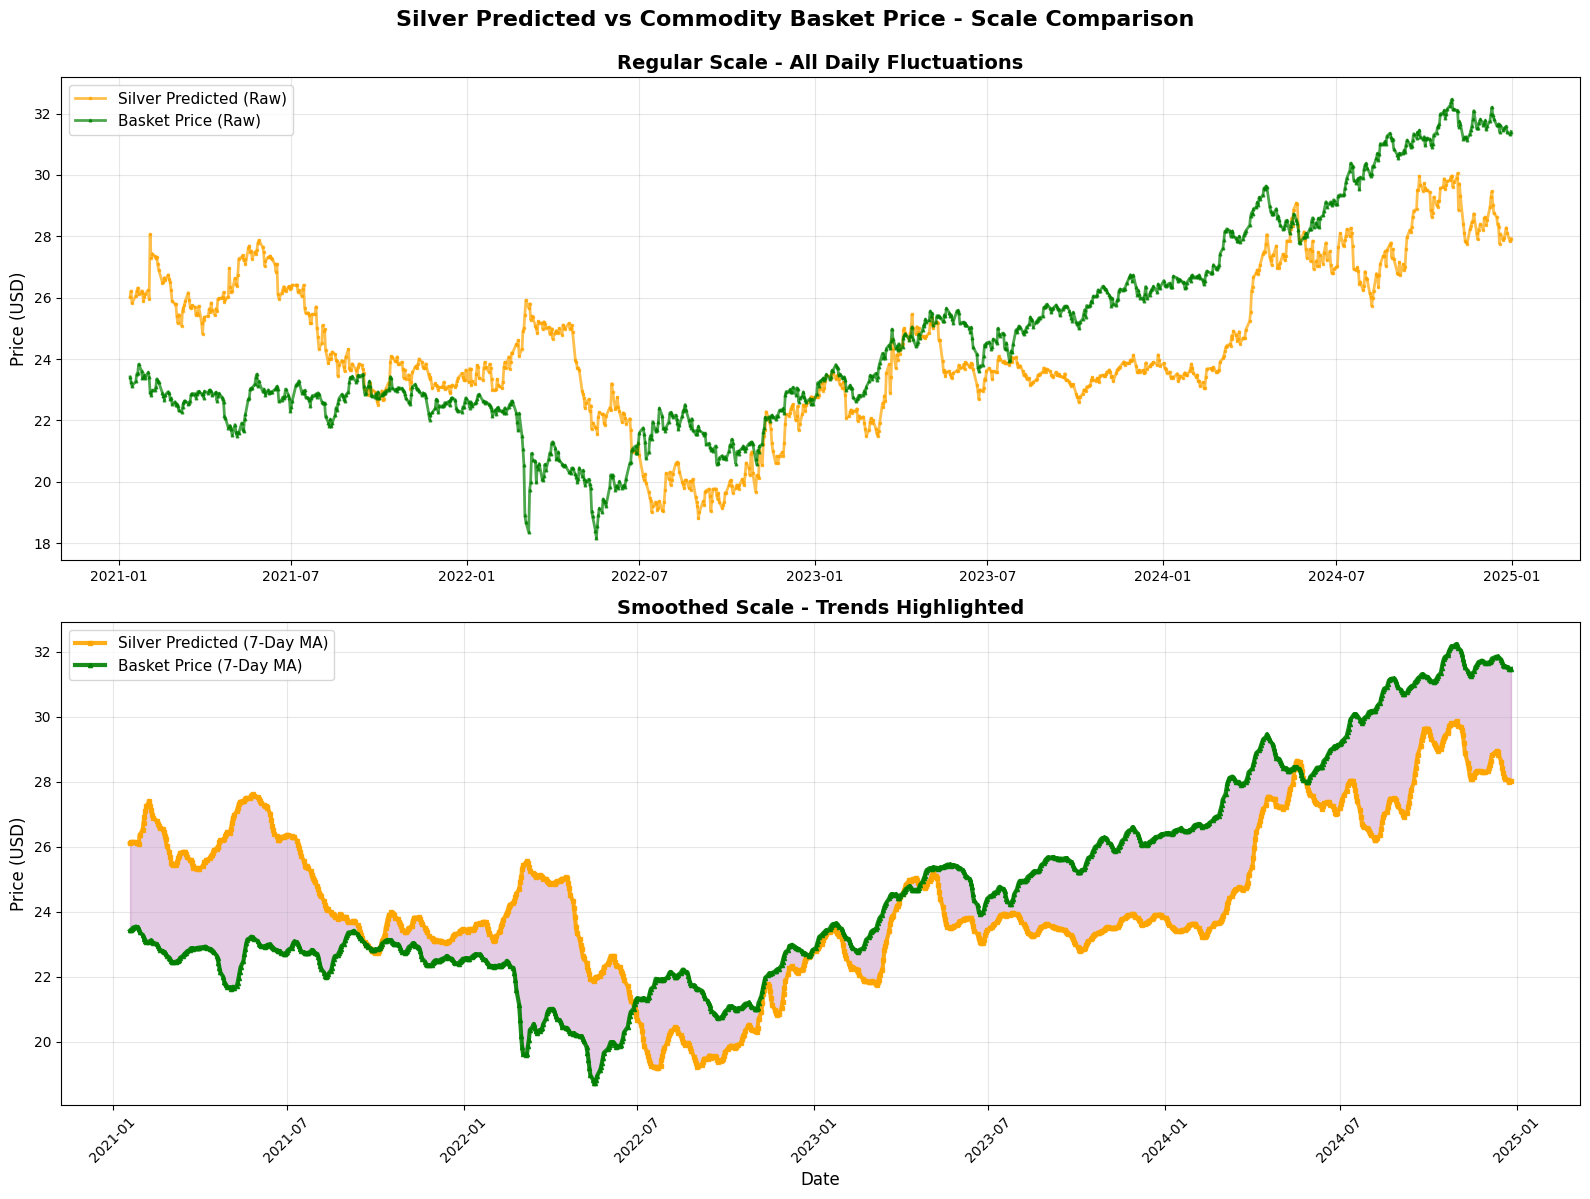

✅ Comparison graph saved: silver_basket_comparison.png


In [7]:
# --- COMBINED COMPARISON GRAPH ---
# Show all four lines together for direct comparison

fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Top panel: Regular scale
axes[0].plot(silver_basket_df['Date'], silver_basket_df['Silver_Predicted'], 
        linewidth=2, color='orange', marker='s', markersize=2, 
        label='Silver Predicted (Raw)', alpha=0.7)
axes[0].plot(silver_basket_df['Date'], silver_basket_df['Basket_Price'], 
        linewidth=2, color='green', marker='^', markersize=2, 
        label='Basket Price (Raw)', alpha=0.7)
axes[0].set_title('Regular Scale - All Daily Fluctuations', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Price (USD)', fontsize=12)
axes[0].legend(loc='best', fontsize=11)
axes[0].grid(True, alpha=0.3)

# Bottom panel: Smoothed scale
axes[1].plot(silver_basket_df['Date'], silver_basket_df['Silver_Predicted_Smooth'], 
        linewidth=3, color='orange', marker='s', markersize=3, 
        label='Silver Predicted (7-Day MA)', alpha=0.9)
axes[1].plot(silver_basket_df['Date'], silver_basket_df['Basket_Price_Smooth'], 
        linewidth=3, color='green', marker='^', markersize=3, 
        label='Basket Price (7-Day MA)', alpha=0.9)
axes[1].fill_between(silver_basket_df['Date'], 
                    silver_basket_df['Silver_Predicted_Smooth'],
                    silver_basket_df['Basket_Price_Smooth'],
                    alpha=0.2, color='purple')
axes[1].set_title('Smoothed Scale - Trends Highlighted', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Price (USD)', fontsize=12)
axes[1].legend(loc='best', fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

fig.suptitle('Silver Predicted vs Commodity Basket Price - Scale Comparison', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('silver_basket_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Comparison graph saved: silver_basket_comparison.png")

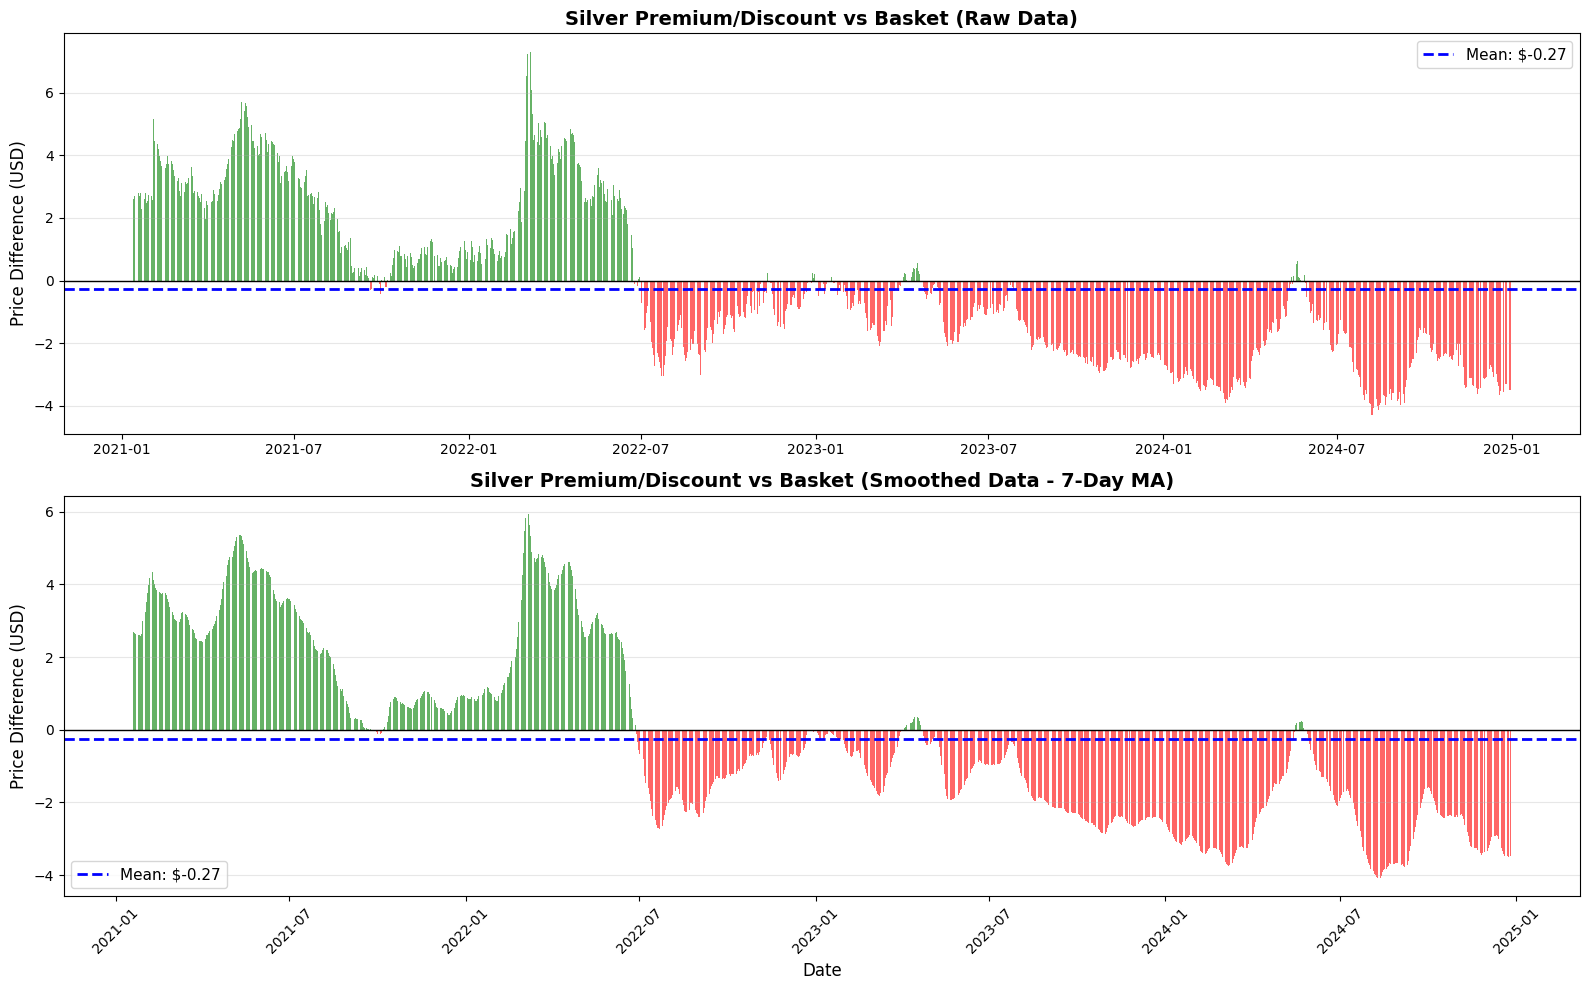

✅ Divergence analysis saved: silver_basket_divergence.png


In [8]:
# --- PRICE DIVERGENCE ANALYSIS ---
# Analyze where Silver premium/discount occurs

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Panel 1: Raw price difference
price_diff = silver_basket_df['Silver_Predicted'] - silver_basket_df['Basket_Price']
colors = ['green' if x > 0 else 'red' for x in price_diff]
axes[0].bar(silver_basket_df['Date'], price_diff, color=colors, alpha=0.6, width=1)
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[0].axhline(y=price_diff.mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: ${price_diff.mean():.2f}')
axes[0].set_title('Silver Premium/Discount vs Basket (Raw Data)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Price Difference (USD)', fontsize=12)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3, axis='y')

# Panel 2: Smoothed price difference
price_diff_smooth = silver_basket_df['Silver_Predicted_Smooth'] - silver_basket_df['Basket_Price_Smooth']
colors_smooth = ['green' if x > 0 else 'red' for x in price_diff_smooth]
axes[1].bar(silver_basket_df['Date'], price_diff_smooth, color=colors_smooth, alpha=0.6, width=1)
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1].axhline(y=price_diff_smooth.mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: ${price_diff_smooth.mean():.2f}')
axes[1].set_title('Silver Premium/Discount vs Basket (Smoothed Data - 7-Day MA)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Price Difference (USD)', fontsize=12)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('silver_basket_divergence.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Divergence analysis saved: silver_basket_divergence.png")

In [9]:
# --- SAVE SUMMARY REPORT ---

report = f"""
╔════════════════════════════════════════════════════════════════════════════════╗
║          SILVER BASKET EVALUATION - FINAL GRAPH ANALYSIS REPORT               ║
╚════════════════════════════════════════════════════════════════════════════════╝

📊 ANALYSIS OVERVIEW
  • Data Points: {len(silver_basket_df)}
  • Date Range: {silver_basket_df['Date'].min().strftime('%Y-%m-%d')} to {silver_basket_df['Date'].max().strftime('%Y-%m-%d')}
  • Smoothing Method: 7-Day Moving Average

═══════════════════════════════════════════════════════════════════════════════════

📈 REGULAR SCALE ANALYSIS (Raw Daily Data)
  ───────────────────────────────────────────────────────────────────────────────
  
  Silver Predicted Price:
    • Mean: ${silver_basket_df['Silver_Predicted'].mean():.2f}
    • Range: ${silver_basket_df['Silver_Predicted'].min():.2f} - ${silver_basket_df['Silver_Predicted'].max():.2f}
    • Std Dev: ${silver_basket_df['Silver_Predicted'].std():.2f}
  
  Commodity Basket Price:
    • Mean: ${silver_basket_df['Basket_Price'].mean():.2f}
    • Range: ${silver_basket_df['Basket_Price'].min():.2f} - ${silver_basket_df['Basket_Price'].max():.2f}
    • Std Dev: ${silver_basket_df['Basket_Price'].std():.2f}
  
  Price Divergence:
    • Mean Difference: ${(silver_basket_df['Silver_Predicted'] - silver_basket_df['Basket_Price']).mean():.2f}
    • Max Premium: ${(silver_basket_df['Silver_Predicted'] - silver_basket_df['Basket_Price']).max():.2f}
    • Max Discount: ${(silver_basket_df['Silver_Predicted'] - silver_basket_df['Basket_Price']).min():.2f}
    • Std Dev: ${(silver_basket_df['Silver_Predicted'] - silver_basket_df['Basket_Price']).std():.2f}
    • Correlation: {silver_basket_df['Silver_Predicted'].corr(silver_basket_df['Basket_Price']):.4f}

═══════════════════════════════════════════════════════════════════════════════════

📊 SMOOTHED SCALE ANALYSIS (7-Day Moving Average)
  ───────────────────────────────────────────────────────────────────────────────
  
  Silver Predicted Price (Smoothed):
    • Mean: ${silver_basket_df['Silver_Predicted_Smooth'].mean():.2f}
    • Range: ${silver_basket_df['Silver_Predicted_Smooth'].min():.2f} - ${silver_basket_df['Silver_Predicted_Smooth'].max():.2f}
    • Std Dev: ${silver_basket_df['Silver_Predicted_Smooth'].std():.2f}
  
  Commodity Basket Price (Smoothed):
    • Mean: ${silver_basket_df['Basket_Price_Smooth'].mean():.2f}
    • Range: ${silver_basket_df['Basket_Price_Smooth'].min():.2f} - ${silver_basket_df['Basket_Price_Smooth'].max():.2f}
    • Std Dev: ${silver_basket_df['Basket_Price_Smooth'].std():.2f}
  
  Price Divergence (Smoothed):
    • Mean Difference: ${(silver_basket_df['Silver_Predicted_Smooth'] - silver_basket_df['Basket_Price_Smooth']).mean():.2f}
    • Max Premium: ${(silver_basket_df['Silver_Predicted_Smooth'] - silver_basket_df['Basket_Price_Smooth']).max():.2f}
    • Max Discount: ${(silver_basket_df['Silver_Predicted_Smooth'] - silver_basket_df['Basket_Price_Smooth']).min():.2f}
    • Std Dev: ${(silver_basket_df['Silver_Predicted_Smooth'] - silver_basket_df['Basket_Price_Smooth']).std():.2f}
    • Correlation: {silver_basket_df['Silver_Predicted_Smooth'].corr(silver_basket_df['Basket_Price_Smooth']):.4f}

═══════════════════════════════════════════════════════════════════════════════════

🎯 KEY INSIGHTS
  ───────────────────────────────────────────────────────────────────────────────
  
  1. VOLATILITY REDUCTION
     • Regular data std dev (Silver): ${silver_basket_df['Silver_Predicted'].std():.2f}
     • Smoothed data std dev (Silver): ${silver_basket_df['Silver_Predicted_Smooth'].std():.2f}
     • Volatility reduction: {((silver_basket_df['Silver_Predicted'].std() - silver_basket_df['Silver_Predicted_Smooth'].std()) / silver_basket_df['Silver_Predicted'].std() * 100):.1f}%
  
  2. TREND VISIBILITY
     • Smoothed scale clearly shows the underlying price trends
     • Removes daily noise while preserving longer-term movements
  
  3. PRICE RELATIONSHIP
     • Correlation (Regular): {silver_basket_df['Silver_Predicted'].corr(silver_basket_df['Basket_Price']):.4f}
     • Correlation (Smoothed): {silver_basket_df['Silver_Predicted_Smooth'].corr(silver_basket_df['Basket_Price_Smooth']):.4f}
     • The prices move together with {silver_basket_df['Silver_Predicted_Smooth'].corr(silver_basket_df['Basket_Price_Smooth']):.1%} correlation

═══════════════════════════════════════════════════════════════════════════════════

📁 OUTPUT GRAPHS
  ───────────────────────────────────────────────────────────────────────────────
  ✅ silver_basket_regular_scale.png      - Regular scale with all daily fluctuations
  ✅ silver_basket_smoothed_scale.png     - Smoothed scale showing clear trends
  ✅ silver_basket_comparison.png         - Side-by-side comparison of both scales
  ✅ silver_basket_divergence.png         - Price premium/discount analysis
  ✅ silver_basket_evaluation_report.txt  - This detailed report

╔════════════════════════════════════════════════════════════════════════════════╗
║  Report Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}                                          ║
╚════════════════════════════════════════════════════════════════════════════════╝
"""

print(report)

# Save report to file
report_filename = f'silver_basket_evaluation_report.txt'
with open(report_filename, 'w') as f:
    f.write(report)
print(f"\n✅ Report saved: {report_filename}")


╔════════════════════════════════════════════════════════════════════════════════╗
║          SILVER BASKET EVALUATION - FINAL GRAPH ANALYSIS REPORT               ║
╚════════════════════════════════════════════════════════════════════════════════╝

📊 ANALYSIS OVERVIEW
  • Data Points: 998
  • Date Range: 2021-01-13 to 2024-12-31
  • Smoothing Method: 7-Day Moving Average

═══════════════════════════════════════════════════════════════════════════════════

📈 REGULAR SCALE ANALYSIS (Raw Daily Data)
  ───────────────────────────────────────────────────────────────────────────────

  Silver Predicted Price:
    • Mean: $24.37
    • Range: $18.81 - $30.05
    • Std Dev: $2.46

  Commodity Basket Price:
    • Mean: $24.64
    • Range: $18.16 - $32.47
    • Std Dev: $3.33

  Price Divergence:
    • Mean Difference: $-0.27
    • Max Premium: $7.31
    • Max Discount: $-4.31
    • Std Dev: $2.46
    • Correlation: 0.6747

════════════════════════════════════════════════════════════════════════

UnicodeEncodeError: 'charmap' codec can't encode characters in position 2-83: character maps to <undefined>